 # Regression Trees

### Regression trees as a particular case of [CART](cart.ipynb)



Consider the regression setting, where the output space is

$$
\mathcal{Y} =  \hat{\mathcal{Y}} =\mathbb{R}.
$$

In regression, a decision tree defines a piecewise-constant function

$$
f : \mathbb{R}^d \to \mathbb{R},
$$

meaning that there exists a partition of the input space into leaves

$\{\ell\}_{\ell \in \mathrm{leaves}(T)}$ such that

$$

f^{T}(x) = f^{T}_\ell

\quad \text{for all } x \in \ell.

$$



Each leaf $\ell$ corresponds to an axis-aligned region of $\mathbb{R}^d$ and is assigned a constant prediction value $f^{T}_\ell \in \mathbb{R}$.

For regression, a standard choice of loss is the squared error loss

$$
\ell(y, \hat y) = (y-\hat y)^2,
\qquad y,\ \hat y \in \mathbb{R}.
$$

Under this loss, the empirical risk of a piecewise-constant predictor $f^{T}$
compatible with a fixed tree structure $T$ is

$$
\begin{aligned}
\mathcal{R}_n(f^{T} \mid T)
&=
\frac{1}{n}
\sum_{\ell \in \mathrm{leaves}(T)}
\sum_{i \in \ell}
(y_i - f^{T}_\ell)^2.
\end{aligned}
$$

Because the predictor is constant inside each leaf, the minimization over leaf predictions decouples across leaves: for each fixed leaf $\ell$,

$$
f^{T}_\ell \in \arg\min_{c \in \mathbb{R}} \sum_{i\in\ell}(y_i-c)^2.
$$

### Optimal leaf prediction (conditional on $T$)

Let $\ell$ be a fixed leaf and define the leaf mean

$$
\bar y_\ell = \frac{1}{|\ell|}\sum_{i\in\ell} y_i.
$$



Consider the leaf objective
$$
J_\ell(c)=\sum_{i\in\ell}(y_i-c)^2.
$$

Differentiating gives

$$
\frac{d}{dc}J_\ell(c) = -2\sum_{i\in\ell}(y_i-c)
= -2\left(\sum_{i\in\ell}y_i-|\ell|c\right),
$$

so the unique minimizer satisfies
$$
c=\bar y_\ell.
$$

Hence, the optimal leaf prediction conditional on $T$ is

$$
f^{T}_\ell = \bar y_\ell.
$$

### Empirical risk at the optimum (conditional on $T$)

Substituting $f^{T}_\ell=\bar y_\ell$ into the empirical risk yields

$$
\mathcal{R}_n(f^{T}_\ast \mid T)
=\frac{1}{n}\sum_{\ell \in \mathrm{leaves}(T)}\sum_{i\in\ell} (y_i-\bar y_\ell)^2.
$$



Define the within-leaf mean squared error (leaf variance)

$$
\mathrm{Var}_\ell:=\frac{1}{|\ell|}\sum_{i\in\ell}(y_i-\bar y_\ell)^2.
$$

Then

$$
\mathcal{R}_n(f^{T}_\ast \mid T)
=\frac{1}{n}\sum_{\ell \in \mathrm{leaves}(T)}|\ell|\,\mathrm{Var}_\ell
=\mathbb{E}[\mathrm{Var}_L],
$$

where $L$ is the random variable denoting the leaf reached by a uniformly randomly sampled training point, so that $\mathbb{P}(L=\ell)=|\ell|/n$.

### The global optimization problem

Learning an optimal regression tree of bounded depth can be written as:

$$
\min_T \; \mathcal{R}_n(f^{T}_\ast \mid T)\quad \text{subject to} \quad \mathrm{depth}(T) \le D.
$$

This problem searches over all possible tree structures and split parameters satisfying the depth constraint.

As in classification, this does not yield a closed-form solution in $T$. While leaf predictions are optimal in closed form conditional on $T$, the minimization over tree structures is combinatorial and intractable in general.

As a consequence, CART employs a greedy, top-down procedure: at each internal node, the split is chosen to locally maximize the reduction in empirical risk, without guaranteeing global optimality. In regression, this is equivalent to greedily maximizing the decrease in weighted mean squared error (variance).

 ## Variance / MSE impurity

 At a node $t$ containing targets $\{y_i\}_{i\in t}$, define

 $$

 \bar y_t = \frac{1}{|t|}\sum_{i\in t} y_i,

 \qquad

 I(t) = \frac{1}{|t|}\sum_{i\in t}(y_i-\bar y_t)^2.

 $$

 This $I(t)$ is exactly the mean squared error of predicting the constant

 $\bar y_t$ at node $t$.

## Split criterion (regression)

Consider a candidate split $s$ at node $t$ producing children $t_L$ and $t_R$. CART selects splits by maximizing the impurity reduction

$$
\Delta I(s,t)=I(t)-\frac{|t_L|}{|t|} I(t_L)-\frac{|t_R|}{|t|} I(t_R), \qquad I(t)=\frac{1}{|t|}\sum_{i\in t}(y_i-\bar y_t)^2.
$$

The algorithm is identical in spirit to classification: only the impurity function differs. The chosen split is locally optimal at the current node and does not look ahead to future splits, hence the greedy nature of CART.

 ## Bias–variance perspective (same idea)



 - Deep trees: low bias, high variance

 - Shallow trees: higher bias, lower variance



 Regularization (depth limits, minimum leaf size, pruning) controls variance.

 ## Code

In [67]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeRegressor as SKDecisionTreeRegressor, export_text
from cart import DecisionTreeRegressor


## Data visualizaiton

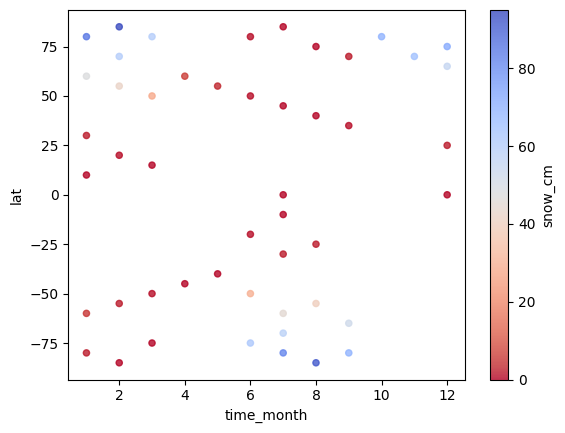

In [68]:
df = pd.read_csv("ski_regression.csv")   
df.plot(x='time_month',y='lat', c='snow_cm', 
    cmap='coolwarm_r',
    alpha=0.8,
    kind='scatter');

## Preoprocesing

In [69]:
y = df.pop('snow_cm').values
train_dicts = df.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(train_dicts)

## Learn (Depth 2)

In [70]:
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X, y);

In [71]:
dt_sk = SKDecisionTreeRegressor(max_depth=2)
dt_sk.fit(X, y)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_le

In [72]:
print("preds:", dt.predict(X)[:5])
print("SK preds  :", dt_sk.predict(X)[:5])
print("Match?    :", np.all(dt.predict(X) == dt_sk.predict(X)))

preds: [ 9.35714286  9.35714286  9.35714286 33.125      75.        ]
SK preds  : [ 9.35714286  9.35714286  9.35714286 33.125      75.        ]
Match?    : True


In [73]:
print(export_text(dt_sk, feature_names=dv.get_feature_names_out()))

|--- lat <= 62.50
|   |--- lat <= -62.50
|   |   |--- value: [46.44]
|   |--- lat >  -62.50
|   |   |--- value: [9.36]
|--- lat >  62.50
|   |--- time_month <= 4.50
|   |   |--- value: [75.00]
|   |--- time_month >  4.50
|   |   |--- value: [33.12]



In [74]:
def plot_decision_regions(
    dt: DecisionTreeRegressor,
    df: pd.DataFrame,
    y: np.ndarray,
    title: str = "Decision Regions",
) -> None:
    # Grid for decision regions
    time_min, time_max = df['time_month'].min() - 0.5, df['time_month'].max() + 0.5
    lat_min,  lat_max  = df['lat'].min() - 2, df['lat'].max() + 2

    xx_time, yy_lat = np.meshgrid(
        np.linspace(time_min, time_max, 400),
        np.linspace(lat_min,  lat_max,  400),
    )

    # IMPORTANT: feature order must match training
    grid = np.c_[yy_lat.ravel(), xx_time.ravel()]
    Z = dt.predict(grid).reshape(xx_time.shape)

    # Decision regions (background)
    plt.contourf(
        xx_time,
        yy_lat,
        Z,
        levels=50,
        cmap='coolwarm_r',
        alpha=0.35,
    )

    # Data points
    scatter = plt.scatter(
        df['time_month'],
        df['lat'],
        c=y,
        cmap='coolwarm_r',
        edgecolor='k',
        alpha=0.8,
    )

    # Colorbar (this is what you asked for)
    cbar = plt.colorbar(scatter)
    cbar.set_label("snow amount")

    plt.xlabel('time_month')
    plt.ylabel('lat')
    plt.title(title)
    plt.show()

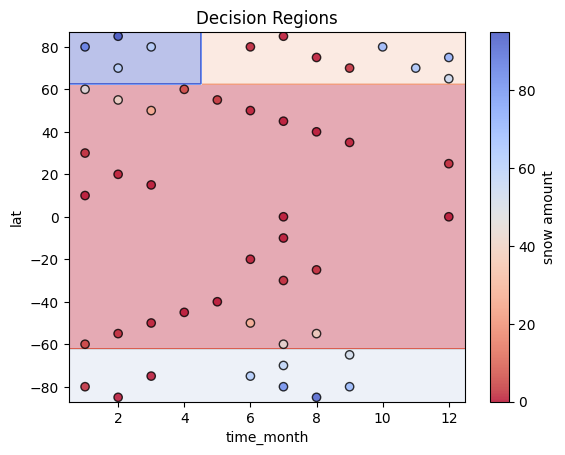

In [75]:
plot_decision_regions(dt, df, y)

## Learn (Depth n)

In [76]:
def leran_plot(depth):
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X, y)
    plot_decision_regions(dt, df, y, title =f"Decision Region (depth={depth})")

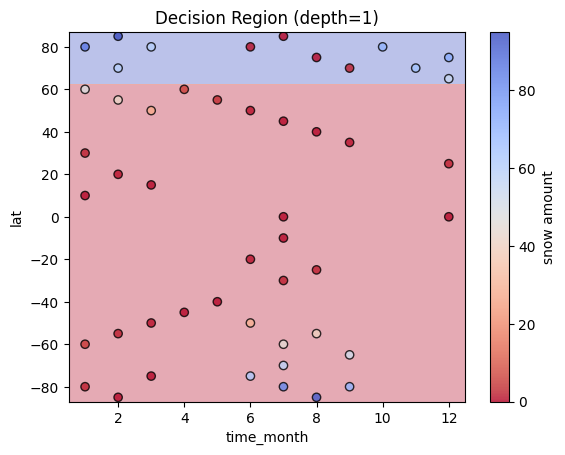

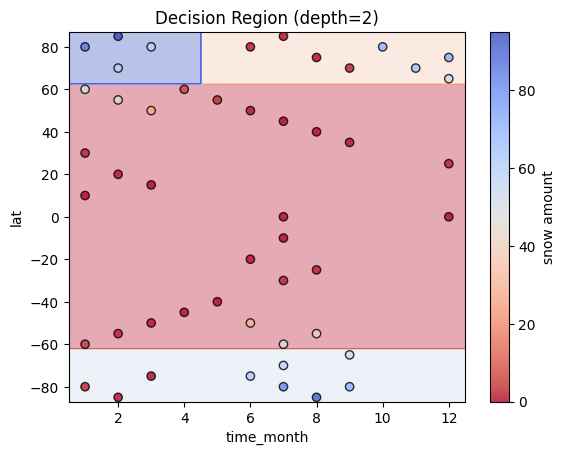

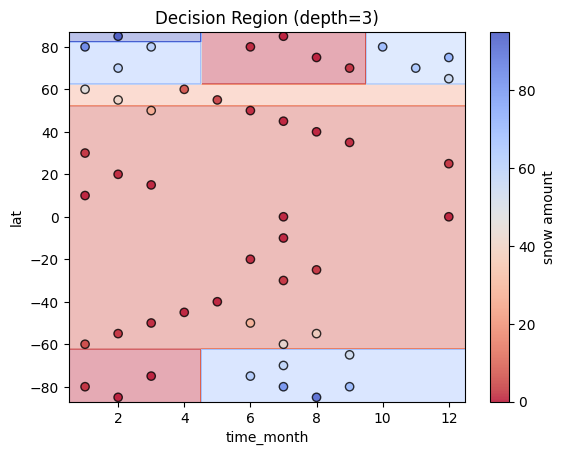

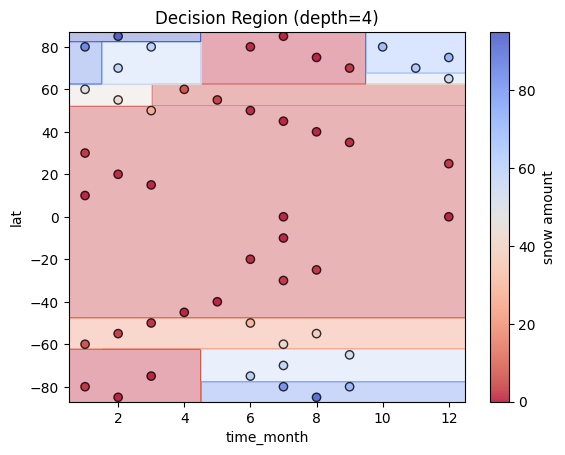

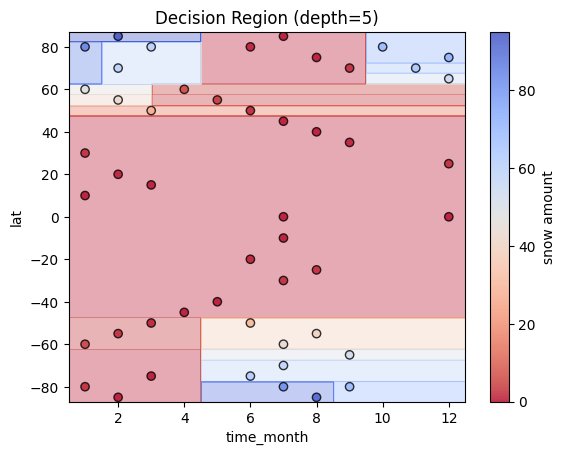

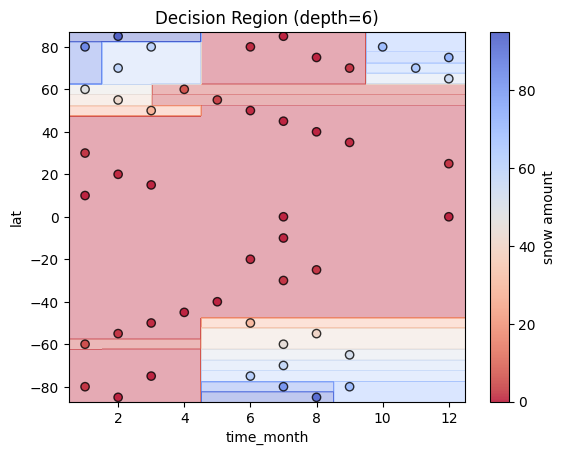

In [77]:
for depth in range(1,7):
    leran_plot(depth)
    